# Análise de Cancelamento de Clientes (Churn) - Telco


## Introdução

Neste projeto, realizamos uma análise de cancelamento de clientes (churn) utilizando o dataset Telco Customer Churn. O objetivo é demonstrar habilidades em análise de dados e Business Intelligence, passando por várias etapas desde o carregamento e exploração dos dados até a construção de um modelo preditivo e a criação de visualizações.

**Objetivos:**
- Explorar e entender o dataset.
- Analisar a distribuição de cancelamento (churn).
- Identificar correlações e variáveis significativas.
- Construir um modelo preditivo de churn.
- Criar visualizações para apresentação dos resultados.


## Carregamento dos Dados

In [1]:

import pandas as pd

# Carregar o dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df_telco = pd.read_csv(file_path)

# Mostrar as primeiras linhas do dataset
df_telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploração dos Dados

In [2]:

# Verificar informações gerais do dataset
df_telco.info()

# Verificar estatísticas descritivas
df_telco.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Análise de Distribuição de Cancelamento (Churn)

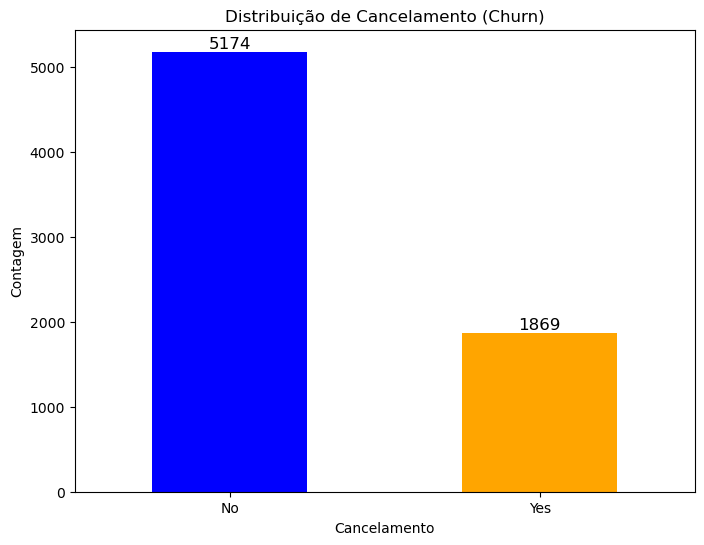

In [3]:

import matplotlib.pyplot as plt

# Contagem da variável 'Churn'
churn_counts = df_telco['Churn'].value_counts()

# Plotar a distribuição de churn
plt.figure(figsize=(8,6))
bars = churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuição de Cancelamento (Churn)')
plt.xlabel('Cancelamento')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

# Adicionar contagem nas barras
for bar in bars.patches:
    plt.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.show()


## Análise de Correlações e Variáveis Significativas

<Figure size 1000x500 with 0 Axes>

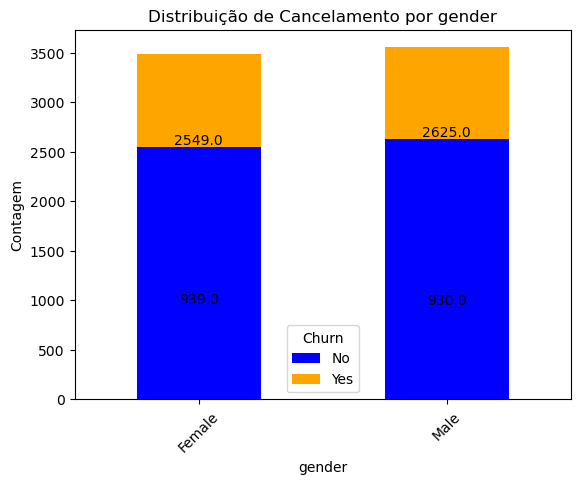

<Figure size 1000x500 with 0 Axes>

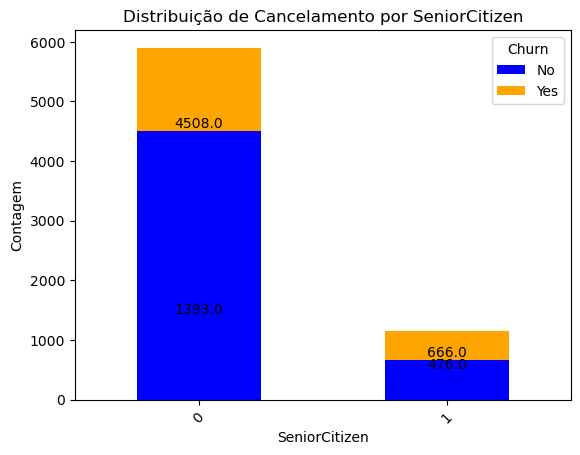

<Figure size 1000x500 with 0 Axes>

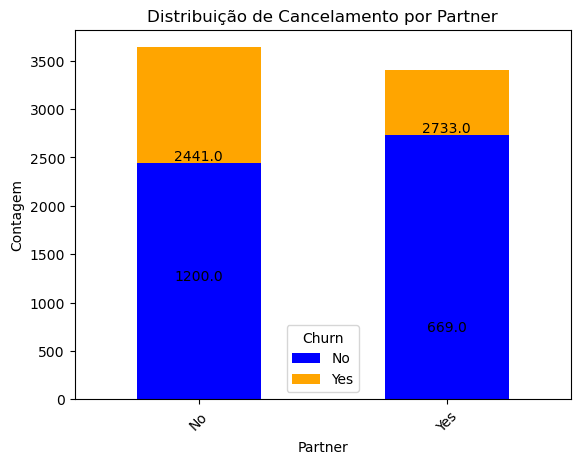

<Figure size 1000x500 with 0 Axes>

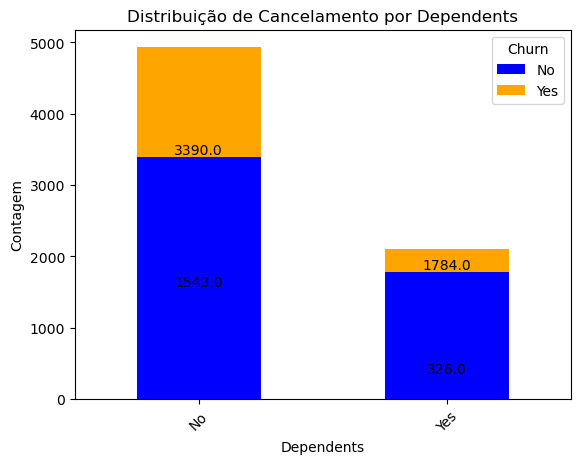

<Figure size 1000x500 with 0 Axes>

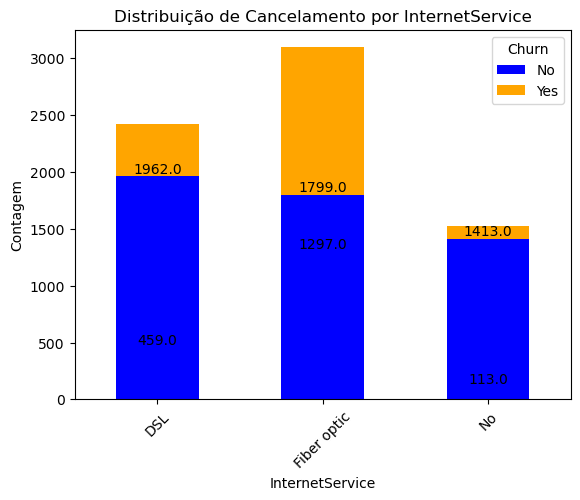

<Figure size 1000x500 with 0 Axes>

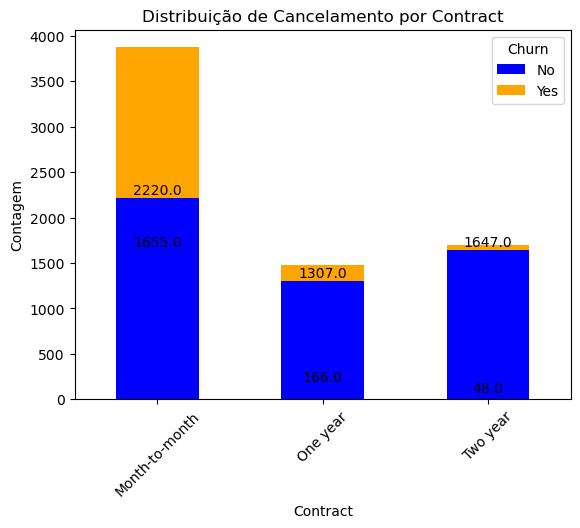

<Figure size 1000x500 with 0 Axes>

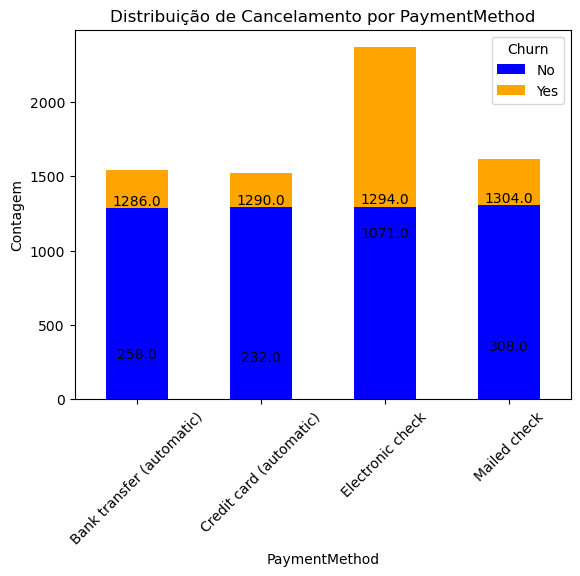

<Figure size 1000x500 with 0 Axes>

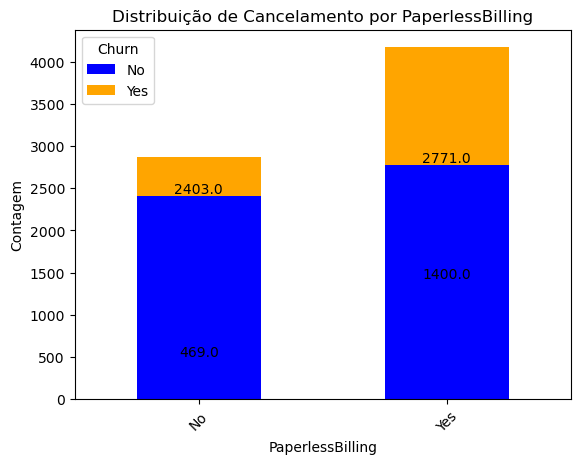

In [4]:

# Selecionar algumas colunas categóricas relevantes
relevant_categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                             'InternetService', 'Contract', 'PaymentMethod', 'PaperlessBilling']

# Função para plotar a distribuição de churn para variáveis categóricas
def plot_categorical_optimized(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 5))
        ax = df.groupby(col)['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', stacked=True, color=['blue', 'orange'])
        plt.title(f'Distribuição de Cancelamento por {col}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=45)

        # Adicionar contagem nas barras
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black')

        plt.show()

# Analisar variáveis categóricas relevantes
plot_categorical_optimized(df_telco, relevant_categorical_cols)


## Construção do Modelo Preditivo de Cancelamento

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Preparar os dados
df_telco_encoded = df_telco.copy()

# Encode das variáveis categóricas
label_encoders = {}
for column in df_telco_encoded.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        df_telco_encoded[column] = le.fit_transform(df_telco_encoded[column])
        label_encoders[column] = le

# Separar features e target
X = df_telco_encoded.drop(['Churn', 'customerID'], axis=1)
y = df_telco_encoded['Churn']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(conf_matrix)
print(class_report)


[[1389  150]
 [ 255  319]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.68      0.56      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



## Criação de Visualizações e Dashboard

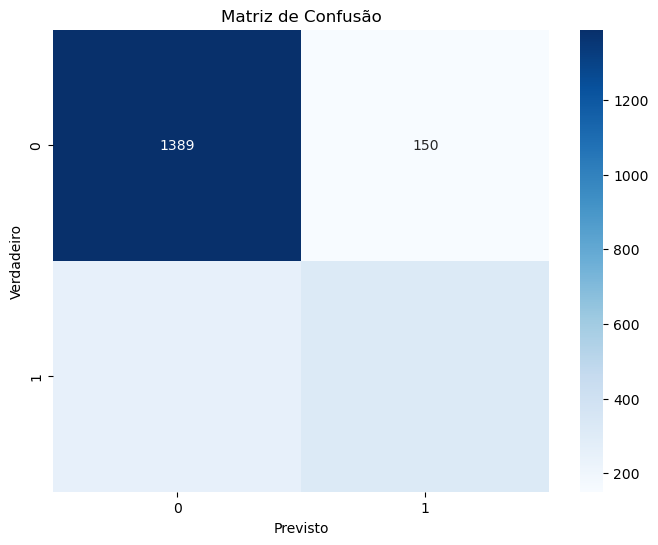

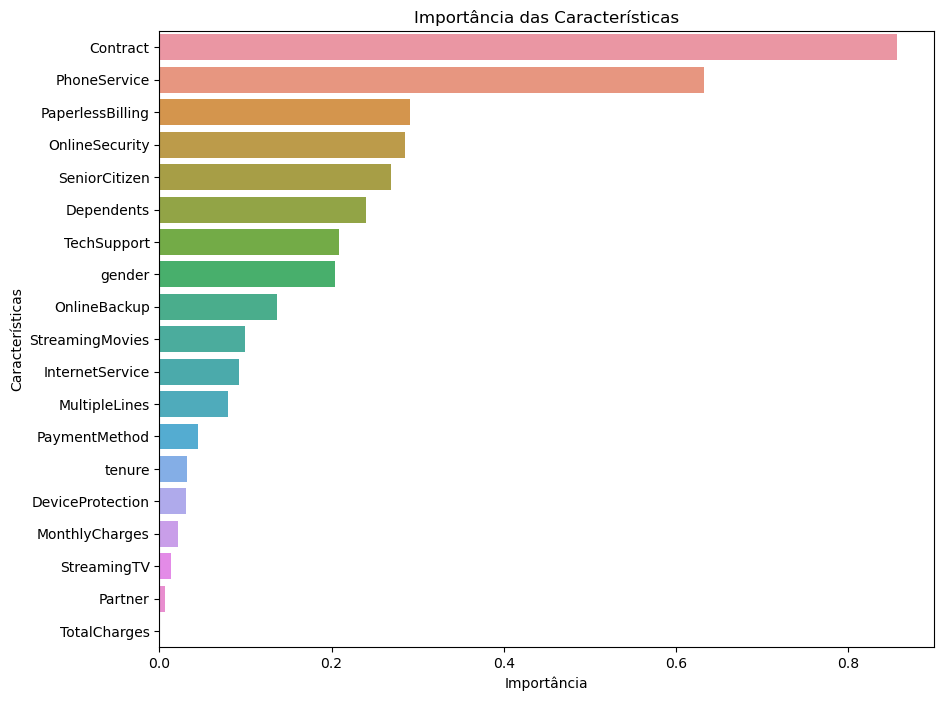

In [6]:

import seaborn as sns
import numpy as np

# Matriz de confusão visual
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Importância das características
feature_importance = abs(model.coef_[0])
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Característica': feature_names, 'Importância': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importância', y='Característica', data=feature_importance_df)
plt.title('Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()



## Conclusão

Esta análise cobriu:
1. **Exploração de Dados**: Carregamento e visualização inicial dos dados.
2. **Análise de Distribuição**: Distribuição de cancelamento no dataset.
3. **Análise de Correlações**: Relações entre cancelamento e variáveis categóricas relevantes.
4. **Modelagem Preditiva**: Construção e avaliação de um modelo de regressão logística para prever cancelamento.
5. **Visualizações Adicionais**: Matriz de confusão e importância das características.
